# XGBoost

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

## Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [5]:
accuracy_score(y_test, rfc_pred)

0.9736842105263158

In [9]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [11]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=4)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.9736842105263158

## XGBoost

In [1]:
from xgboost import XGBClassifier, plot_importance

In [6]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
accuracy_score(y_test, xgb_pred)

0.9912280701754386

In [8]:
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [10]:
xgb = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=4)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
accuracy_score(y_test, xgb_pred)

1.0

### Early Stopping

In [12]:
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=1)

[0]	validation_0-logloss:0.616287
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.552531
[2]	validation_0-logloss:0.501124
[3]	validation_0-logloss:0.456354
[4]	validation_0-logloss:0.418732
[5]	validation_0-logloss:0.384026
[6]	validation_0-logloss:0.351816
[7]	validation_0-logloss:0.326893
[8]	validation_0-logloss:0.302045
[9]	validation_0-logloss:0.281723
[10]	validation_0-logloss:0.262412
[11]	validation_0-logloss:0.247358
[12]	validation_0-logloss:0.233282
[13]	validation_0-logloss:0.218648
[14]	validation_0-logloss:0.202336
[15]	validation_0-logloss:0.190999
[16]	validation_0-logloss:0.181319
[17]	validation_0-logloss:0.171201
[18]	validation_0-logloss:0.161166
[19]	validation_0-logloss:0.154174
[20]	validation_0-logloss:0.145404
[21]	validation_0-logloss:0.139487
[22]	validation_0-logloss:0.1329
[23]	validation_0-logloss:0.125716
[24]	validation_0-logloss:0.120839
[25]	validation_0-logloss:0.115783
[26]	validation_0-logloss:0.11061

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [13]:
xgb_pred = xgb.predict(X_test)
accuracy_score(y_test, xgb_pred)

1.0

### Feature Importance

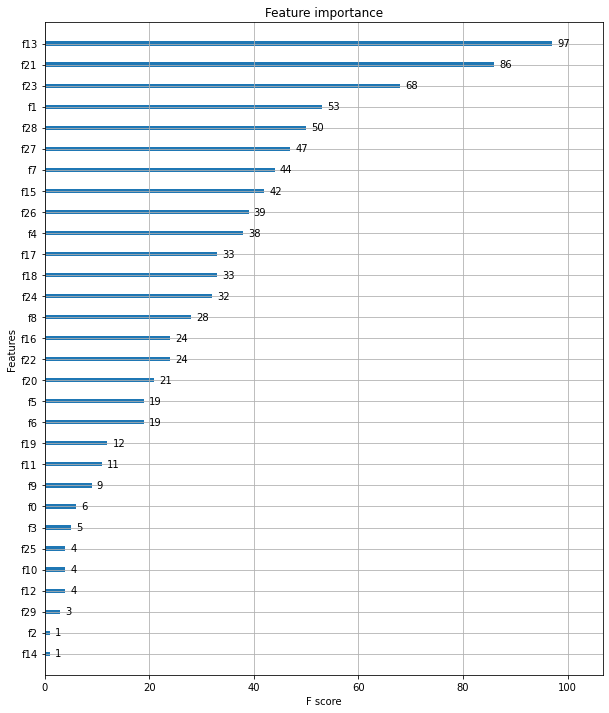

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb, ax=ax);

### Plot Model

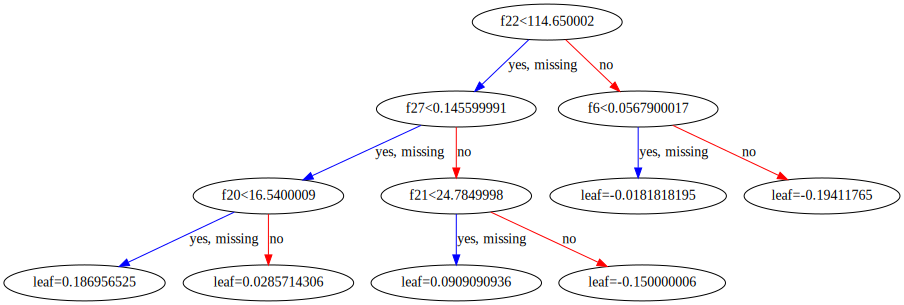

In [18]:
import graphviz
from xgboost import to_graphviz
dot_data = to_graphviz(xgb)
graph = graphviz.Source(dot_data)
graph